In [1]:
%matplotlib inline
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import datetime
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
from collections import defaultdict
from pprint import pprint

In [2]:
rune_dict = {8112: 'Electrocute', 8124: 'Predator', 8128: 'Dark Harvest', 9923: 'Hail of Blades',
             8351: 'Glacial Augment', 8360: 'Unsealed Spellbook', 8369: 'First Strike', 8005: 'Press the Attack',
             8008: 'Lethal Tempo', 8021: 'Fleet Footwork', 8010: 'Conqueror', 8437: 'Grasp of the Undying',
             8439: 'Aftershock', 8465: 'Guardian', 8214: 'Summon Aery', 8229: 'Arcane Comet', 8230: 'Phase Rush'}



In [3]:
totalNum = 0
runes = []
wins = []
champions = []
lanes = []

files_path = "data/"
for filename in os.listdir(files_path):
    with open(files_path + filename) as f:
#         print (filename) #troubleshooting
        try:
            data = json.load(f)
#             print(data)
        except json.JSONDecodeError:
            continue
        for key in data.keys():
            keytemp = len(data[key])
            totalNum+=keytemp
            
            for i in range(keytemp):
                runes.append(data[key][i]["rune"])
                wins.append(data[key][i]["win"])
                champions.append(data[key][i]["championName"])
                lanes.append(data[key][i]["lane"])
            
runes = [rune_dict[r] for r in runes]            
print(f'There are {totalNum} data points')
print(runes[:10])            
print(wins[:10])            
print(lanes[:10])    
print(champions[:10])            

There are 142040 data points
['Conqueror', 'Aftershock', 'Arcane Comet', 'Lethal Tempo', 'Hail of Blades', 'Conqueror', 'Conqueror', 'Lethal Tempo', 'Lethal Tempo', 'Arcane Comet']
[False, False, False, False, False, True, True, True, True, True]
['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'BOTTOM', 'TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'BOTTOM']
['Darius', 'Sejuani', 'AurelionSol', 'Kindred', 'Ashe', 'Mordekaiser', 'JarvanIV', 'Yone', 'Kaisa', 'Morgana']


In [ ]:
rune_win_rates = {}
rune_usage_counts = {}

rune_width = 23
count_width = 14
rate_width = 15
play_rate_width = 25

# Print the headers
print(f"{'Rune':<{rune_width}} {'Usage Count':<{count_width}} {'Win Rate':<{rate_width}} {'Playrate':<{play_rate_width}}")


for i, rune in enumerate(runes):
    if rune not in rune_win_rates:
        rune_win_rates[rune] = [0, 0]
        rune_usage_counts[rune] = 0
    
    if wins[i]:
        rune_win_rates[rune][0] += 1
    rune_win_rates[rune][1] += 1
    rune_usage_counts[rune] += 1

# Sort the runes by usage count
sorted_runes = sorted(rune_win_rates.items(), key=lambda x: rune_usage_counts[x[0]], reverse=True)

# Print the data
for rune, win_rate in sorted_runes:
    win_count, total_count = win_rate
    usage_count = rune_usage_counts[rune]
    average_win_rate = win_count / total_count
    print(f"{rune:<{rune_width}} {usage_count:<{count_width}} {average_win_rate:<{rate_width}.4f} {(usage_count/totalNum):<{play_rate_width}.4f}")

Rune                    Usage Count    Average Win Rate
Conqueror               25771          0.5082         
Lethal Tempo            24354          0.4974         
Dark Harvest            13711          0.4980         
Arcane Comet            10864          0.4965         
Electrocute             10214          0.4926         
Summon Aery             9437           0.5047         
Grasp of the Undying    8908           0.4851         
Press the Attack        7354           0.5072         
First Strike            6841           0.4855         
Fleet Footwork          5269           0.5067         
Aftershock              4639           0.5217         
Hail of Blades          4359           0.4916         
Glacial Augment         3976           0.4970         
Phase Rush              3839           0.4999         
Guardian                2083           0.5166         
Predator                255            0.4549         
Unsealed Spellbook      166            0.6024         


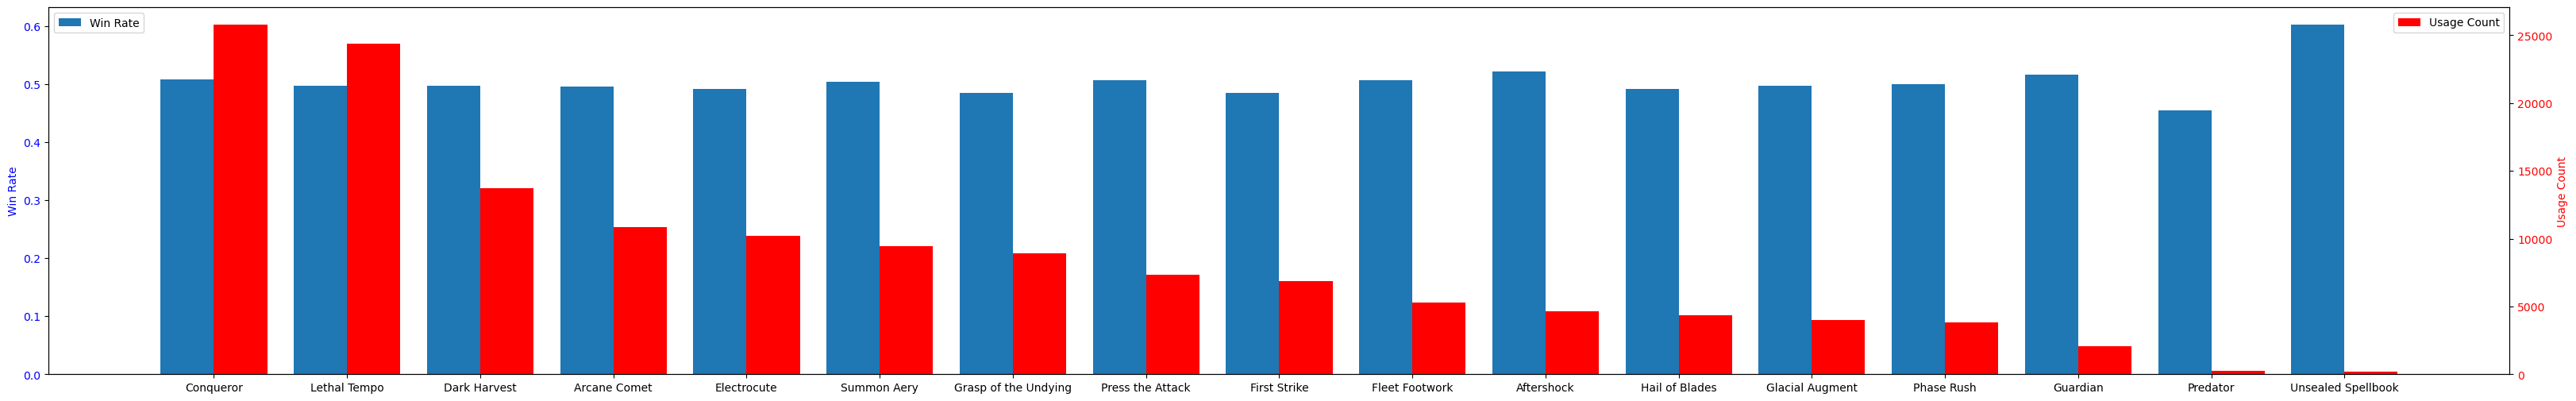

In [5]:
rune_win_rates = {}
rune_usage_counts = {}

for i, rune in enumerate(runes):
    if rune not in rune_win_rates:
        rune_win_rates[rune] = [0, 0]
        rune_usage_counts[rune] = 0
    
    if wins[i]:
        rune_win_rates[rune][0] += 1
    rune_win_rates[rune][1] += 1
    rune_usage_counts[rune] += 1

win_rates = []
usage_counts = []
labels = []

for rune, win_rate in rune_win_rates.items():
    win_count, total_count = win_rate
    usage_count = rune_usage_counts[rune]
    win_rate = win_count / total_count
    win_rates.append(win_rate)
    usage_counts.append(usage_count)
    labels.append(str(rune))

# Sort the labels, usage counts, and win rates in descending order of usage counts
sorted_data = sorted(zip(labels, usage_counts, win_rates), key=lambda x: x[1], reverse=True)
labels = [x[0] for x in sorted_data]
usage_counts = [x[1] for x in sorted_data]
win_rates = [x[2] for x in sorted_data]

x = [i for i in range(len(labels))]

fig, ax = plt.subplots(figsize=(40, 6))
ax.bar([i - 0.2 for i in x], win_rates, width=0.4, align='center', label='Win Rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
ax.set_ylabel('Win Rate', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx()
ax2.bar([i + 0.2 for i in x], usage_counts, width=0.4, align='center', label='Usage Count', color="red")
ax2.set_ylabel('Usage Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.show()


In [6]:
rune_lane_win = defaultdict(lambda: defaultdict(int))
rune_lane_counts = defaultdict(lambda: defaultdict(int))

for rune, lane, win in zip(runes, lanes, wins):
    rune_lane_counts[rune][lane] += 1
    if win:
        rune_lane_win[rune][lane] += 1

rune_lane_rates = defaultdict(dict)

for rune, lane_counts in rune_lane_counts.items():
    for lane, win_count in lane_counts.items():
        lane_rate = rune_lane_win[rune][lane] / rune_lane_counts[rune][lane]
        rune_lane_rates[rune][lane] = lane_rate

for rune, lane_rates in rune_lane_rates.items():
    print(f"{rune}:")
    for lane, rate in lane_rates.items():
        print(f"{lane[:4]}: \t{rate:.3f}\t {rune_lane_counts[rune][lane]}")
    print()

Conqueror:
TOP: 	0.505	 7431
JUNG: 	0.514	 8146
BOTT: 	0.520	 1926
MIDD: 	0.492	 3935
NONE: 	0.513	 4333

Aftershock:
JUNG: 	0.514	 1403
MIDD: 	0.524	 538
NONE: 	0.530	 872
BOTT: 	0.525	 1538
TOP: 	0.514	 288

Arcane Comet:
MIDD: 	0.518	 3230
BOTT: 	0.478	 4296
JUNG: 	0.579	 240
NONE: 	0.479	 1816
TOP: 	0.516	 1282

Lethal Tempo:
BOTT: 	0.493	 10706
MIDD: 	0.484	 2985
JUNG: 	0.526	 3189
TOP: 	0.500	 3334
NONE: 	0.495	 4140

Hail of Blades:
BOTT: 	0.507	 1782
MIDD: 	0.498	 614
JUNG: 	0.471	 1103
TOP: 	0.518	 224
NONE: 	0.469	 636

Summon Aery:
MIDD: 	0.524	 1600
BOTT: 	0.510	 5710
NONE: 	0.464	 1527
TOP: 	0.504	 397
JUNG: 	0.512	 203

Electrocute:
MIDD: 	0.495	 5991
BOTT: 	0.463	 871
JUNG: 	0.472	 1185
NONE: 	0.508	 1484
TOP: 	0.508	 683

First Strike:
BOTT: 	0.445	 1113
MIDD: 	0.513	 2473
TOP: 	0.503	 942
NONE: 	0.444	 922
JUNG: 	0.485	 1391

Grasp of the Undying:
JUNG: 	0.492	 770
NONE: 	0.475	 1814
TOP: 	0.480	 5111
MIDD: 	0.513	 776
BOTT: 	0.522	 437

Dark Harvest:
JUNG: 	0.472	 299

In [7]:
rune_champ_win = defaultdict(lambda: defaultdict(int))
rune_champ_counts = defaultdict(lambda: defaultdict(int))

for rune, champion, win in zip(runes, champions, wins):
    rune_champ_counts[rune][champion] += 1
    if win:
        rune_champ_win[rune][champion] += 1

rune_champ_rates = defaultdict(dict)

for rune, champion_counts in rune_champ_counts.items():
    for champion, win_count in champion_counts.items():
        champion_rate = rune_champ_win[rune][champion] / rune_champ_counts[rune][champion]
        rune_champ_rates[rune][champion] = champion_rate

for rune, champion_rates in rune_champ_rates.items():
    print(f"{rune}:")
    for champion, rate in champion_rates.items():
        print(f"{champion:<12} {rate:.3f}\t {rune_champ_counts[rune][champion]}")
    print()

Conqueror:
Darius       0.509	 985
Mordekaiser  0.565	 1413
JarvanIV     0.509	 1103
Garen        0.531	 603
Jayce        0.381	 231
Samira       0.477	 908
Singed       0.575	 233
Viego        0.518	 874
Zac          0.625	 112
MonkeyKing   0.527	 1114
LeeSin       0.491	 1079
Jax          0.372	 191
Kled         0.538	 403
Vladimir     0.638	 141
Amumu        0.518	 440
Aatrox       0.441	 658
Ezreal       0.534	 610
Milio        1.000	 3
Illaoi       0.464	 478
Belveth      0.529	 456
Sett         0.568	 767
Kindred      0.466	 191
Gnar         0.541	 61
Riven        0.491	 918
Yuumi        0.400	 5
Yasuo        0.531	 162
Kayn         0.531	 708
Gwen         0.508	 510
Akali        0.439	 636
Thresh       0.333	 6
Vi           0.462	 463
Zed          0.536	 252
Irelia       0.461	 894
Lillia       0.482	 307
Nocturne     0.600	 90
Swain        0.545	 402
Diana        0.566	 583
Olaf         0.537	 583
Hecarim      0.488	 289
Renekton     0.507	 286
Heimerdinger 0.421	 19
Nilah     